In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# View info and check missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [7]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Drop rows with missing values (simple handling)
df.dropna(inplace=True)

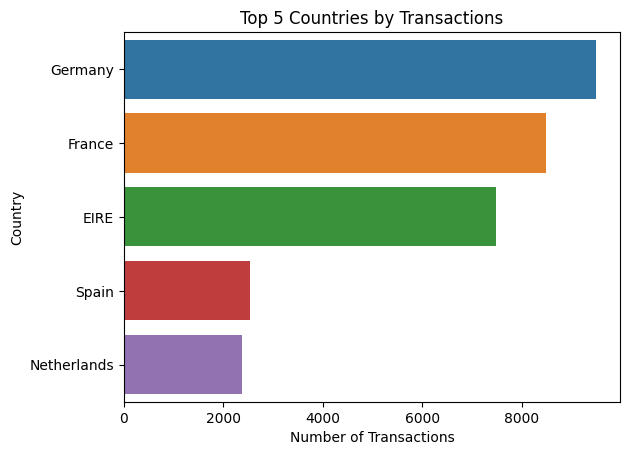

In [9]:
# Top 5 selling countries (excluding UK if it's dominant)
top_countries = df['Country'].value_counts().drop('United Kingdom', errors='ignore').head(5)

# Plot
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 5 Countries by Transactions')
plt.xlabel('Number of Transactions')
plt.show()

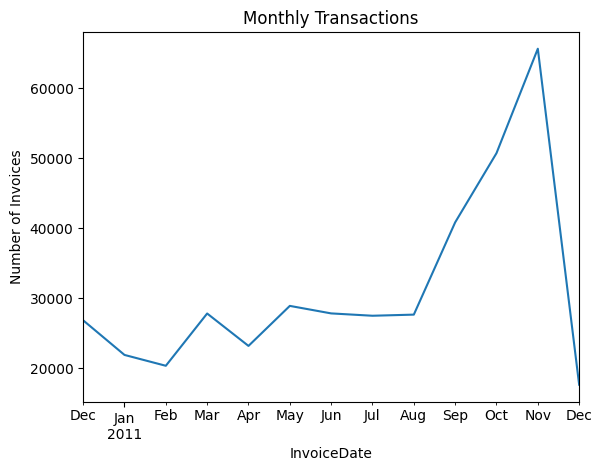

In [10]:
# Transactions over time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate').resample('M')['InvoiceNo'].count().plot()
plt.title('Monthly Transactions')
plt.ylabel('Number of Invoices')
plt.show()

In [11]:
# Create 'TotalAmount' feature
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Keep only positive values (valid purchases)
df = df[df['TotalAmount'] > 0]

In [12]:
# Encode Country labels
le = LabelEncoder()
df['CountryLabel'] = le.fit_transform(df['Country'])

In [13]:
# Features and target
X = df[['Quantity', 'UnitPrice', 'TotalAmount']]
y = df['CountryLabel']

In [14]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

                      precision    recall  f1-score   support

           Australia       0.41      0.05      0.10       204
             Austria       0.00      0.00      0.00        78
             Bahrain       0.00      0.00      0.00         4
             Belgium       0.92      0.03      0.05       432
              Brazil       0.00      0.00      0.00         6
              Canada       0.00      0.00      0.00        30
     Channel Islands       0.00      0.00      0.00       159
              Cyprus       0.00      0.00      0.00       114
      Czech Republic       0.00      0.00      0.00         5
             Denmark       0.67      0.03      0.05        79
                EIRE       0.53      0.02      0.03      1406
  European Community       0.00      0.00      0.00         5
             Finland       0.17      0.01      0.03       138
              France       0.44      0.01      0.02      1623
             Germany       0.52      0.03      0.06      1867
       

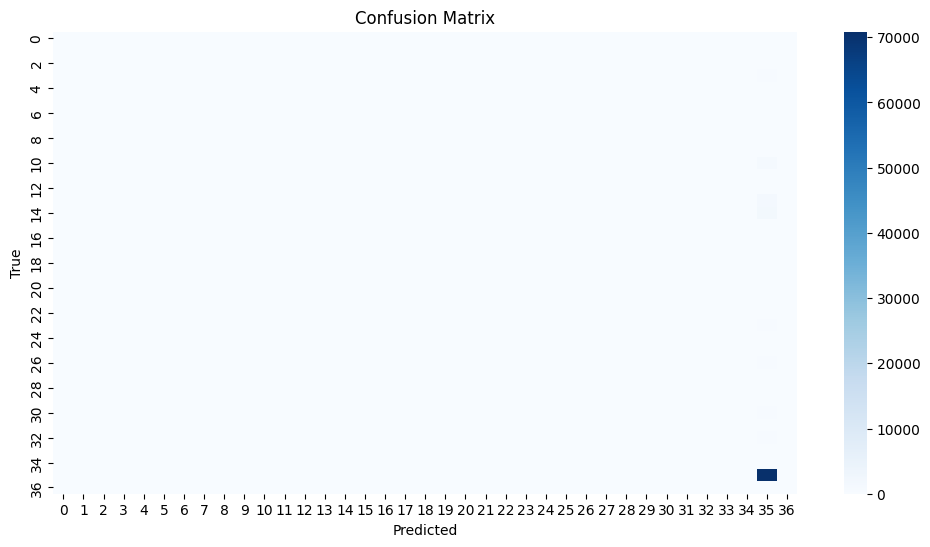

In [17]:
# Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()